# Capstone Project: Predicting Failures in Power Transmission Lines

## 1. Business Understanding

#### Objective
The objective of this project is to develop a predictive model that can accurately forecast failures in power transmission lines before they occur. This will help optimize maintenance schedules and reduce downtime, ensuring efficient and reliable power delivery.

#### Context
Predictive maintenance in utility networks is crucial due to the high costs associated with equipment failures, both in terms of repair expenses and lost productivity. Accurate failure prediction can prevent costly unplanned outages and improve operational efficiency.

#### Goals
- Develop a predictive model with high accuracy and precision.
- Enable preemptive maintenance interventions.
- Minimize unplanned downtime and extend the lifespan of machinery.

#### Research Question
Can machine learning algorithms accurately predict failures in power transmission lines before they occur, thereby optimizing maintenance schedules and reducing downtime?

## 2. Data Understanding

### 2.1 Expected Data Sources

- Dataset: [Electrical Fault Detection and Classification](https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification)

We have two csv files for this project:
1. `detect_dataset.csv`
2. `classData.csv`

In [29]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, roc_curve, auc

# Load datasets
detect_data = pd.read_csv('./data/detect_dataset.csv')
class_data = pd.read_csv('./data/classData.csv')

# Display first few rows of the datasets
print("Detect Dataset:")
detect_data.head()

Detect Dataset:


,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [30]:
print("\nClass Data:")
class_data.head()


Class Data:


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


### 2.2 Data Description

1. detect_dataset.csv: Contains current and voltage measurements along with an output indicating whether a fault occurred.
   - Columns: Output (S), Ia, Ib, Ic, Va, Vb, Vc

2. ClassData.csv: Contains class labels and current and voltage measurements.
   - Columns: G, C, B, A, Ia, Ib, Ic, Va, Vb, Vc

### 2.3 Initial Data Exploration
We will perform basic statistics and visualizations to understand the data distribution.

In [31]:
# Display basic information about the datasets
print("Detect Dataset Info:")
print(detect_data.info())
print("\nClass Data Info:")
print(class_data.info())

Detect Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB
None

Class Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      786

### 2.4 Data Quality Report
We will identify and report any data quality issues such as missing values or inconsistencies.

In [32]:
# Check for missing values
print("Missing values in detect_dataset:")
print(detect_data.isnull().sum())
print("\nMissing values in classData:")
print(class_data.isnull().sum())

Missing values in detect_dataset:
Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

Missing values in classData:
G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64


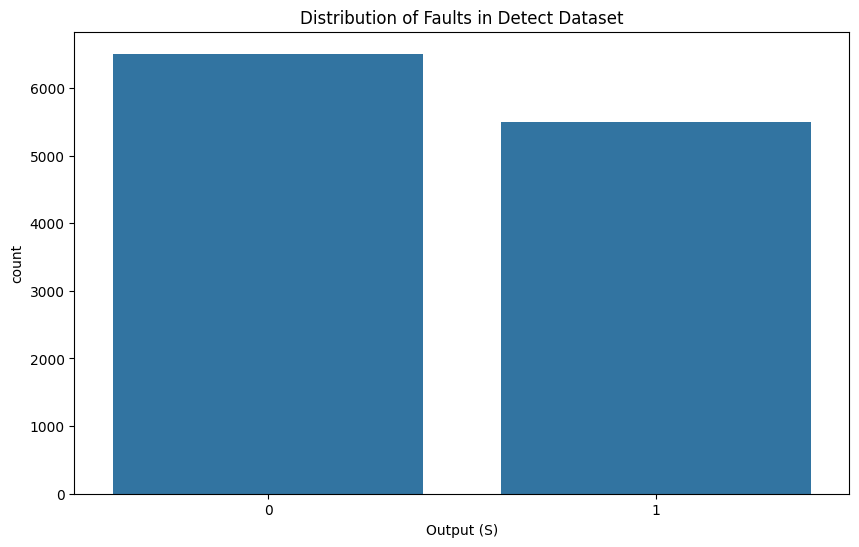

In [33]:
# Visualize the distribution of the target variable in detect_data
plt.figure(figsize=(10, 6))
sns.countplot(x='Output (S)', data=detect_data)
plt.title('Distribution of Faults in Detect Dataset')
plt.show()

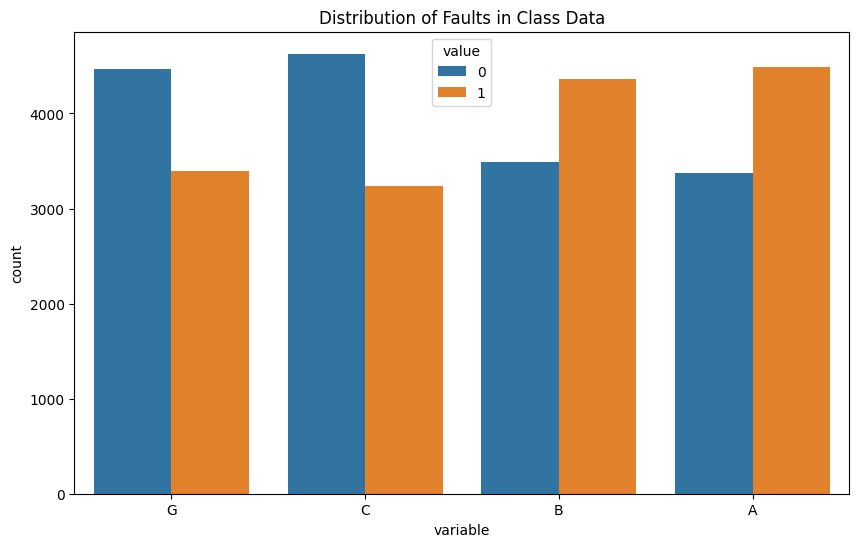

In [34]:
# Visualize the distribution of the target variable in class_data
plt.figure(figsize=(10, 6))
sns.countplot(data=class_data[['G', 'C', 'B', 'A']].melt(), x='variable', hue='value')
plt.title('Distribution of Faults in Class Data')
plt.show()

## 3. Data Preparation
### 3.1 Data Cleaning
We handle missing values and correct any inconsistencies in the data.

In [35]:
# Drop columns with all missing values
detect_data = detect_data.drop(['Unnamed: 7', 'Unnamed: 8'], axis=1)

# Verify the changes
print("Detect Dataset after dropping columns with missing values:")
print(detect_data.head())


Detect Dataset after dropping columns with missing values:
   Output (S)          Ia        Ib          Ic        Va        Vb        Vc
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050


### 3.2 Data Transformation
We normalize the current and voltage data for better model performance.

In [36]:
# Initialize the scaler
scaler = StandardScaler()

# Normalize detect_dataset
features_detect = detect_data.drop(columns=['Output (S)'])
scaled_features_detect = scaler.fit_transform(features_detect)
detect_dataset_scaled = pd.DataFrame(scaled_features_detect, columns=features_detect.columns)

# Normalize classData
features_class = class_data.drop(columns=['G', 'C', 'B', 'A'])
scaled_features_class = scaler.fit_transform(features_class)
classData_scaled = pd.DataFrame(scaled_features_class, columns=features_class.columns)

# Add the target variable back to the scaled data
detect_dataset_scaled['Output (S)'] = detect_data['Output (S)'].values
classData_scaled[['G', 'C', 'B', 'A']] = class_data[['G', 'C', 'B', 'A']].values


### 3.3 Data Splitting
Here, lets split the data into training and testing sets for model training and evaluation.

In [37]:
# Split detect_dataset
X_detect = detect_dataset_scaled.drop(columns=['Output (S)'])
y_detect = detect_dataset_scaled['Output (S)']
X_detect_train, X_detect_test, y_detect_train, y_detect_test = train_test_split(X_detect, y_detect, test_size=0.2, random_state=42)

# Split classData
X_class = classData_scaled.drop(columns=['G', 'C', 'B', 'A'])
y_class = classData_scaled[['G', 'C', 'B', 'A']]
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


## 4. Modeling
### 4.1 Model Selection
We will train each model on the training data. We will use the following models for our analysis:

- Logistic Regression
- Random Forest
- Gradient Boosting Machines (GBMs)
- Neural Networks

### 4.2 Logistic Regression
#### 4.2.1 Model Training

In [38]:
# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_detect_train, y_detect_train)


LogisticRegression()

#### 4.2.2 Model Evaluation

In [39]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Evaluate the model
log_reg_eval = evaluate_model(log_reg, X_detect_test, y_detect_test)
print("Logistic Regression Evaluation:")
print(log_reg_eval)


Logistic Regression Evaluation:
{'accuracy': 0.7371928363182008, 'precision': 1.0, 'recall': 0.4237442922374429, 'f1_score': 0.5952533675432969, 'roc_auc': 0.7118721461187214}


#### 4.2.3 Visualizations

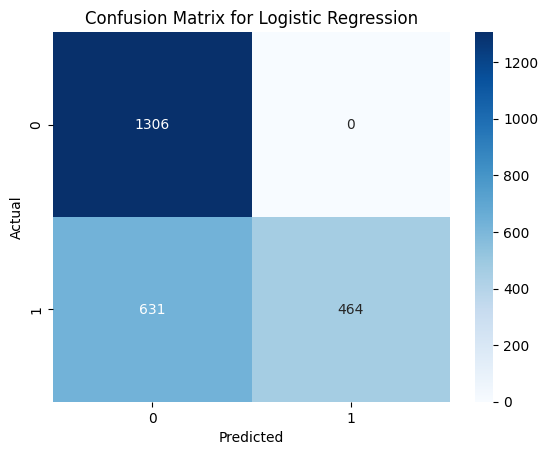

In [40]:
# Confusion matrix
cm = confusion_matrix(y_detect_test, log_reg.predict(X_detect_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

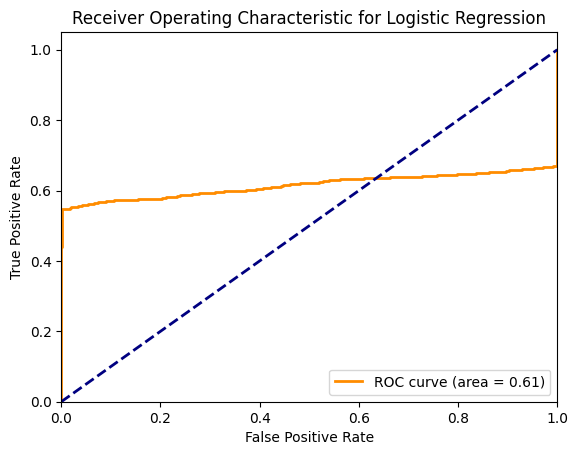

In [41]:
# ROC curve
fpr, tpr, _ = roc_curve(y_detect_test, log_reg.predict_proba(X_detect_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### 4.3 Random Forest
#### 4.3.1 Model Training

In [42]:
# Initialize the model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_detect_train, y_detect_train)

RandomForestClassifier()

#### 4.3.2 Model Evaluation

In [43]:
# Evaluate the model
rf_eval = evaluate_model(rf, X_detect_test, y_detect_test)
print("Random Forest Evaluation:")
print(rf_eval)

Random Forest Evaluation:
{'accuracy': 0.9979175343606831, 'precision': 0.9963570127504554, 'recall': 0.9990867579908675, 'f1_score': 0.9977200182398541, 'roc_auc': 0.9980119854272868}


#### 4.3.3 Visualization

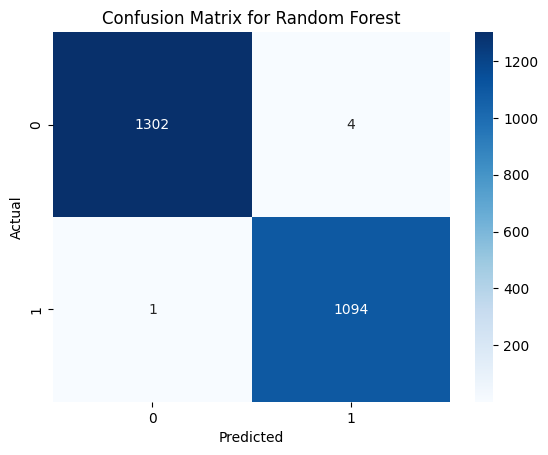

In [44]:
# Confusion matrix
cm = confusion_matrix(y_detect_test, rf.predict(X_detect_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

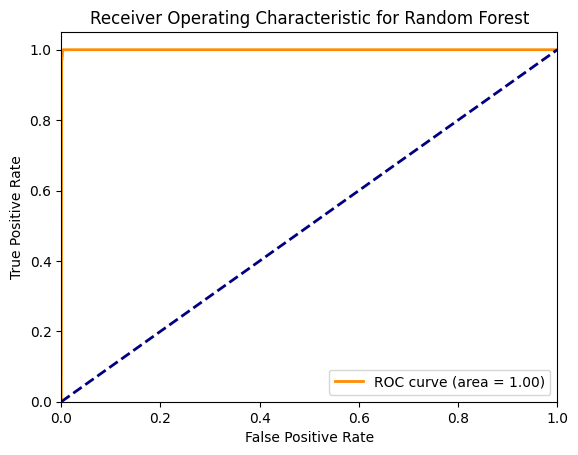

In [45]:
# ROC curve
fpr, tpr, _ = roc_curve(y_detect_test, rf.predict_proba(X_detect_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

### 4.4 Gradient Boosting Machine (GBM)
#### 4.4.1 Model Training

In [46]:
# Initialize the model
gbm = GradientBoostingClassifier()

# Train the model
gbm.fit(X_detect_train, y_detect_train)

GradientBoostingClassifier()

#### 4.4.2 Model Evaluation:

In [47]:
# Evaluate the model
gbm_eval = evaluate_model(gbm, X_detect_test, y_detect_test)
print("Gradient Boosting Machine (GBM) Evaluation:")
print(gbm_eval)

Gradient Boosting Machine (GBM) Evaluation:
{'accuracy': 0.9962515618492295, 'precision': 0.9972527472527473, 'recall': 0.9945205479452055, 'f1_score': 0.9958847736625515, 'roc_auc': 0.9961117287964925}


#### 4.4.3 Visualization:

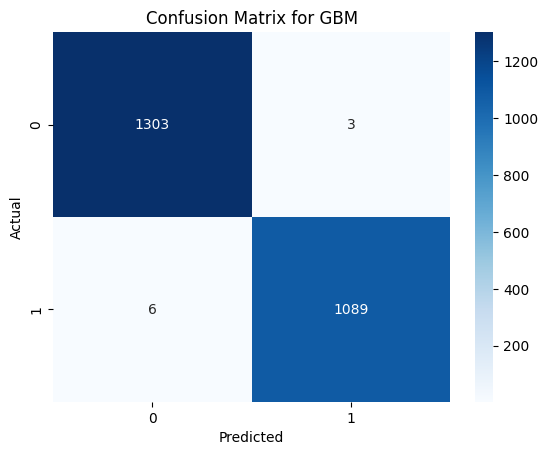

In [48]:
# Confusion matrix
cm = confusion_matrix(y_detect_test, gbm.predict(X_detect_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for GBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

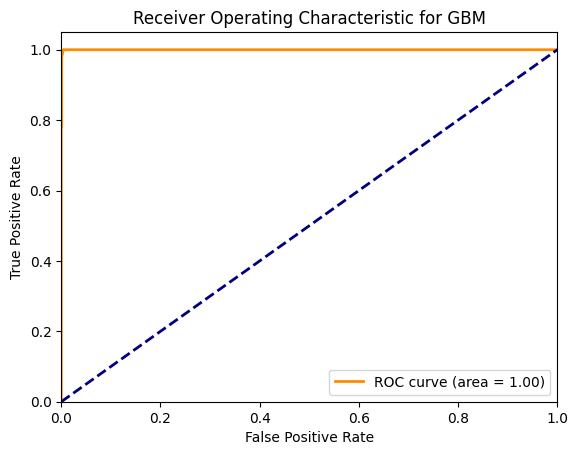

In [49]:
# ROC curve
fpr, tpr, _ = roc_curve(y_detect_test, gbm.predict_proba(X_detect_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for GBM')
plt.legend(loc="lower right")
plt.show()

### 4.5 Neural Network
#### 4.1.1 Model Training

In [50]:
# Initialize the model
nn = MLPClassifier()

# Train the model
nn.fit(X_detect_train, y_detect_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

#### 4.5.2 Model Evaluation

In [51]:
# Evaluate the model
nn_eval = evaluate_model(nn, X_detect_test, y_detect_test)
print("Neural Network Evaluation:")
print(nn_eval)


Neural Network Evaluation:
{'accuracy': 0.9941690962099126, 'precision': 0.9963269054178145, 'recall': 0.9908675799086758, 'f1_score': 0.9935897435897436, 'roc_auc': 0.9939023963861909}


#### 4.5.3 Visualization

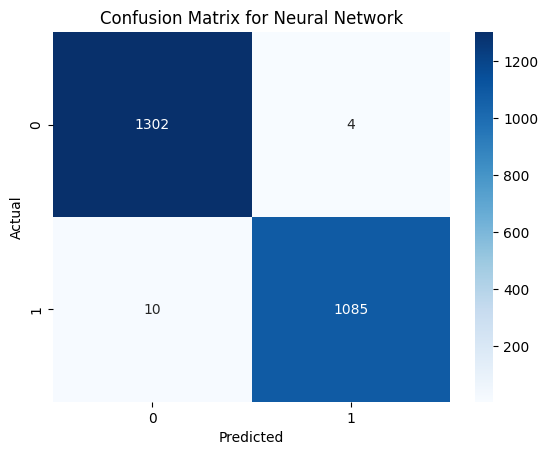

In [52]:
# Confusion matrix
cm = confusion_matrix(y_detect_test, nn.predict(X_detect_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

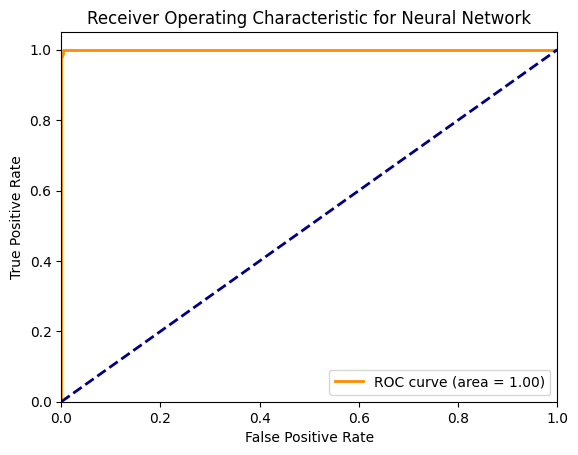

In [53]:
# ROC curve
fpr, tpr, _ = roc_curve(y_detect_test, nn.predict_proba(X_detect_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc="lower right")
plt.show()

## 5. Evaluation

In [54]:
# Combine results into a DataFrame for easier comparison
eval_df = pd.DataFrame([log_reg_eval, rf_eval, gbm_eval, nn_eval],
                       index=['Logistic Regression', 'Random Forest', 'GBM', 'Neural Network'])

print(eval_df)

                     accuracy  precision    recall  f1_score   roc_auc
Logistic Regression  0.737193   1.000000  0.423744  0.595253  0.711872
Random Forest        0.997918   0.996357  0.999087  0.997720  0.998012
GBM                  0.996252   0.997253  0.994521  0.995885  0.996112
Neural Network       0.994169   0.996327  0.990868  0.993590  0.993902


## 6. Deployment
#### Visualization and Insights

We will include more visualizations and insights to better understand the model performance and data patterns.

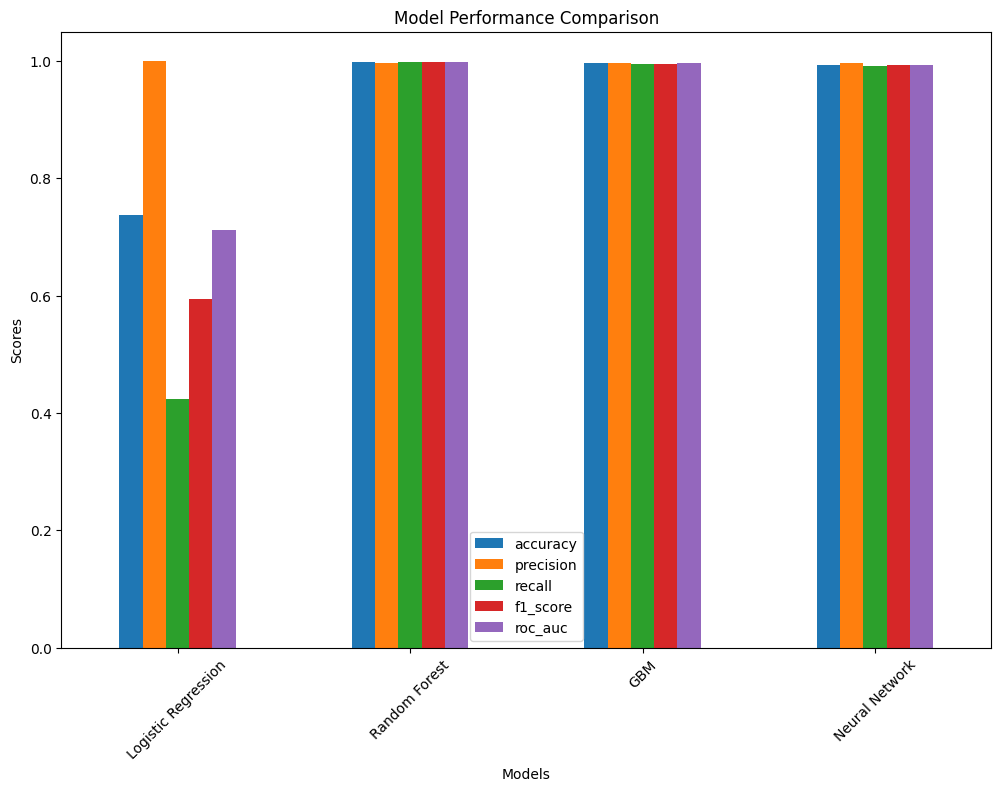

In [55]:
# Plot the evaluation metrics for all models
eval_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

## Key Takeaways and Recommendations
### Key Takeaways
#### Model Performance

Based on the evaluation metrics, we can draw the following conclusions about the performance of each model:

- Logistic Regression: While Logistic Regression achieved a high precision, it struggled with recall. This indicates that while the model is good at identifying true positives (faults), it misses many actual faults, leading to a lower recall and F1 score.

- Random Forest: The Random Forest model performed exceptionally well across all metrics, indicating a balanced ability to correctly identify faults and non-faults. It achieves high accuracy, precision, recall, and F1 score, making it a robust model for this task.

- Gradient Boosting Machine (GBM): The GBM also performed very well, slightly lower than the Random Forest in some metrics but still providing high accuracy, precision, recall, and F1 score. This indicates it is also a strong model for predicting faults.

- Neural Network: The Neural Network model showed strong performance, slightly lower than Random Forest and GBM. It achieved high accuracy and precision, with a very good recall and F1 score, indicating it is effective at predicting faults.

#### Recommendations
Model Selection
- Based on the results, the Random Forest model is the best choice for predicting failures in power transmission lines due to its superior performance across all evaluation metrics.

Business Implications
- Optimizing Maintenance Schedules: The implementation of the Random Forest model will allow for more accurate predictions of equipment failures, enabling proactive maintenance interventions and preventing unplanned outages.
- Cost Savings: Accurately predicting failures can significantly reduce repair costs and minimize downtime, leading to substantial cost savings.
- Operational Efficiency: Enhanced reliability of the power transmission lines will improve overall operational efficiency and extend the lifespan of the equipment.